# Text Classification with Bag of Words - Natural Language Processing



> _"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."_ - Wikipedia

> _**Bag of Words**: The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears._

Outline:

1. Download and explore a real-world dataset
2. Apply text preprocessing techniques
3. Implement the bag of words model
4. Train ML models for text classification!

### Explore the Data using Pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df = pd.read_csv("/content/drive/MyDrive/Datasets/traintext.csv")

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
raw_df['question_text'][0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [ ]:
raw_df['question_text'][1]

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
sincere_df = raw_df[raw_df.target == 0]

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df = raw_df[raw_df.target == 1]

In [ ]:
insincere_df.question_text.values[5:15]

array(['Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?",
       'Would Europeans continue to participate in the Arab war for the destruction of Israel and killing all the Jews, if they knew that god himself defends Israel and he will do to Europeans what the Arabs want to do to the Jews?',
       'Why are Americans, British, Canadians, Australians and New Zealanders considered to be separate nations even when they all speak the same language?',
       'If both Honey Singh and J

In [ ]:
raw_df.target.value_counts()

,count
target,
0,1225312
1,80810


<Axes: ylabel='proportion'>

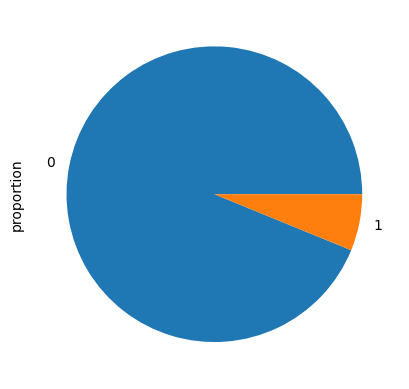

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind="pie")

### Create a Working Sample


In [ ]:
sample_df = raw_df.sample(100000, random_state=42)

In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [ ]:
s = sincere_df.question_text.values[4]

In [ ]:
q1 = raw_df[raw_df.target == 1].question_text.values[12]

In [ ]:
q1

'If both Honey Singh and Justin Bieber fall from the 5th floor, who will survive?'

### Tokenization

splitting a document into words and separators

In [ ]:
!pip install --upgrade nltk

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/root/nltk_data/tokenizers/punkt')

In [ ]:
a = 'raju is graduated in BBA'

In [ ]:
word_tokenize(a)

In [ ]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
word_tokenize('hello my name is pramod %% < ?')

['hello', 'my', 'name', 'is', 'pramod', '%', '%', '<', '?']

In [ ]:
word_tokenize(' this is (something) with, a lot of, punctuation;')

['this',
 'is',
 '(',
 'something',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [ ]:
q1

'If both Honey Singh and Justin Bieber fall from the 5th floor, who will survive?'

In [ ]:
word_tokenize(q1)

['If',
 'both',
 'Honey',
 'Singh',
 'and',
 'Justin',
 'Bieber',
 'fall',
 'from',
 'the',
 '5th',
 'floor',
 ',',
 'who',
 'will',
 'survive',
 '?']

In [ ]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### Stop Word Removal

Removing commonly occuring words

In [ ]:
s

'Can I convert montra helicon D to a mountain bike by just changing the tyres?'

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
', '.join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
x = 'Hello'
x.upper()

'HELLO'

In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
a = 'vishal is the bad boy in the college'

In [ ]:
remove_stopwords(a)

['v',
 'h',
 'l',
 ' ',
 ' ',
 'h',
 'e',
 ' ',
 'b',
 ' ',
 'b',
 ' ',
 'n',
 ' ',
 'h',
 'e',
 ' ',
 'c',
 'l',
 'l',
 'e',
 'g',
 'e']

In [ ]:
q0_stp = remove_stopwords(q0_tok)

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q1_stp = remove_stopwords(q1_tok)

In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

pragrammimng, pragrammer, programs, program = program

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming

"go", "gone", "going" -> "go"
"birds", "bird" -> "bird"

In [ ]:
programmer , programming, programs, programed === program

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem('programmer')

'programm'

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
stemmer.stem("supposedly")

'suppos'

In [ ]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [ ]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [ ]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [ ]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization

"love" -> "love"
"loving" -> "love"
"lovable" -> "love"


## Implement Bag of Words


Outline:

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Create a Vocabulary

In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
small_df = sample_df[:5]

In [ ]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [ ]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
small_vect = CountVectorizer()

In [ ]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [ ]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [ ]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform documents into Vectors

In [ ]:
vectors = small_vect.transform(small_df.question_text)

In [ ]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
vectors.shape

(5, 51)

In [ ]:
small_df.question_text.values[1]

'Can I study abroad after 10th class from Bangladesh?'

In [ ]:
vectors[1].toarray()

array([[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0]])

In [ ]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

### Configure Count Vectorizer Parameters

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [ ]:
tokenize('What is the really where , & # (dealing) here?')

['what',
 'is',
 'the',
 'realli',
 'where',
 ',',
 '&',
 '#',
 '(',
 'deal',
 ')',
 'here',
 '?']

In [ ]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer = tokenize,
                             stop_words = english_stopwords,
                             max_features = 1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 31.1 s, sys: 55.4 ms, total: 31.1 s
Wall time: 31.4 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7afedd718820>)

In [ ]:
len(vectorizer.vocabulary_)

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 31.2 s, sys: 93.4 ms, total: 31.3 s
Wall time: 31.6 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 548298 stored elements in Compressed Sparse Row format>

In [ ]:
sample_df.question_text.values[157]

'In a story, if a person in a homosexual relationship breaks up and ends up in a heterosexual relatioship as endgame, is it bad writing that is unsupportive of LGBT+? What would you think about that if you saw/read something like that?'

## ML Models for Text Classification

Outline:

- Create a training & validation set
- Train a logistic regression model
- Make predictions on training, validation & test data

### Split into Training and Validation Set

In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target,
                                                                        test_size=0.3, random_state=42)

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
train_targets.shape

(70000,)

In [ ]:
val_inputs.shape

(30000, 1000)

In [ ]:
val_targets.shape

(30000,)

### Train Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

In [ ]:
model = LogisticRegression(max_iter = MAX_ITER, solver='sag')

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 21.3 s, sys: 13.8 ms, total: 21.3 s
Wall time: 21.4 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

133883     0
343925     0
1190558    0
317078     0
355610     0
          ..
262505     0
879467     0
411614     0
859707     0
683832     0
Name: target, Length: 70000, dtype: int64

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(train_preds).value_counts()

0    67957
1     2043
dtype: int64

In [ ]:
pd.Series(train_targets).value_counts()

0    65784
1     4216
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9504428571428571

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(train_targets,train_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     65784
           1       0.68      0.33      0.45      4216

    accuracy                           0.95     70000
   macro avg       0.82      0.66      0.71     70000
weighted avg       0.94      0.95      0.94     70000



In [ ]:
train_targets.shape

(70000,)

In [ ]:
train_preds.shape

(70000,)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_targets, train_preds)

0.4457581083240134